# Analisando para segmentação de clientes

Neste notebook será feito a segmentação de clientes com o objetivo de identificar os perfis do clientes, assim conhecendo esses perfis, pode-se usar estratégias de acordo com o perfil.

Neste primeiro momento será feito uma análise exploratória, após isso será feito a clusterização

In [1]:
# Importando as bliniotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seg_clientes = pd.read_csv('Seg_clientes.csv')
seg_clientes.drop('Unnamed: 0',axis=1,inplace=True)
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
3,Male,Yes,56,No,Artist,0.0,Average,2.0
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0


### Dicionários dos dados

- **Gender**: Gênero do cliente
- **Ever_Married**: se está casado ou não
- **Age**: Idade do cliente
- **Graduated**: Profissão do cliente
- **Work_Experience**: anos de experiência no trabalho do cliente
- **Spending_Score**: Pontuação de gastos do cliente
- **Family_size**: Número de membros da família do cliente (incluindo o cliente)

In [3]:
seg_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7037 non-null   object 
 1   Ever_Married     7037 non-null   object 
 2   Age              7037 non-null   int64  
 3   Graduated        7037 non-null   object 
 4   Profession       7037 non-null   object 
 5   Work_Experience  7037 non-null   float64
 6   Spending_Score   7037 non-null   object 
 7   Family_Size      7037 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 439.9+ KB


In [4]:
# Convertendo as coluna work e family de float para inteiro
seg_clientes['Work_Experience'] = seg_clientes['Work_Experience'].astype(int)
seg_clientes['Family_Size'] = seg_clientes['Family_Size'].astype(int)
seg_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           7037 non-null   object
 1   Ever_Married     7037 non-null   object
 2   Age              7037 non-null   int64 
 3   Graduated        7037 non-null   object
 4   Profession       7037 non-null   object
 5   Work_Experience  7037 non-null   int64 
 6   Spending_Score   7037 non-null   object
 7   Family_Size      7037 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 439.9+ KB


## Análise Univariada

Text(0, 0.5, 'Quantidade')

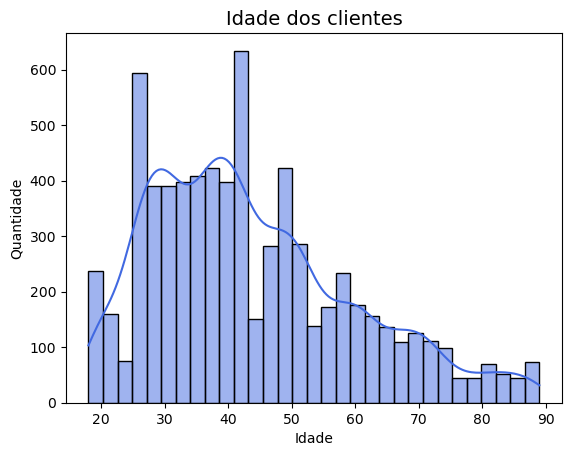

In [5]:
plt.title('Idade dos clientes',fontsize=14)
sns.histplot(x='Age',data=seg_clientes,kde=True,color='royalblue')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

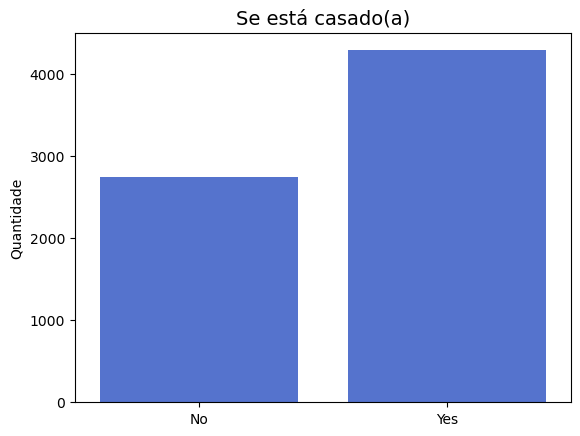

In [6]:
plt.title('Se está casado(a)',fontsize=14)
sns.countplot(x='Ever_Married',data=seg_clientes,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

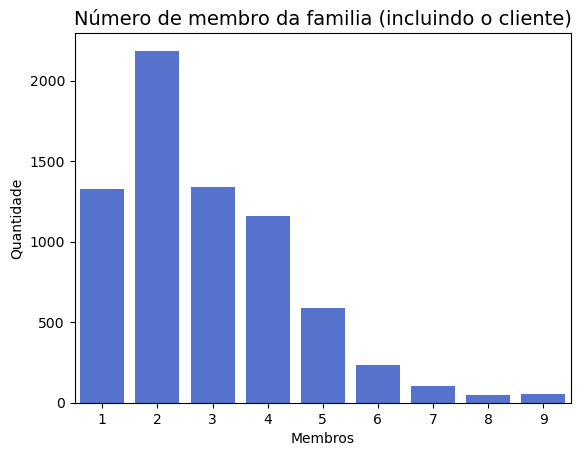

In [7]:
plt.title('Número de membro da familia (incluindo o cliente)',fontsize=14)
sns.countplot(x='Family_Size',data=seg_clientes,color='royalblue')
plt.xlabel('Membros')
plt.ylabel('Quantidade')

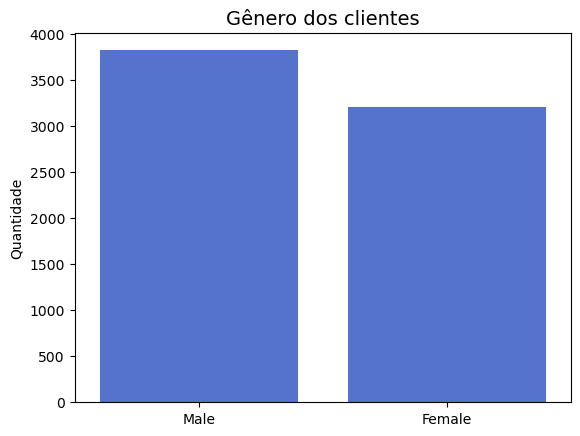

In [8]:
plt.title('Gênero dos clientes',fontsize=14)
sns.countplot(x='Gender',data=seg_clientes,
              color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade');

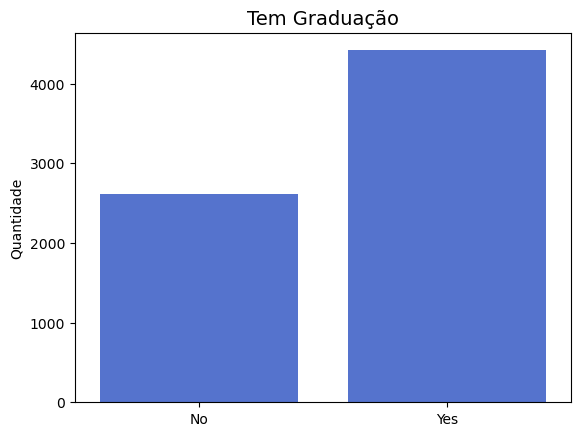

In [9]:
plt.title('Tem Graduação',fontsize=14)
sns.countplot(x='Graduated',data=seg_clientes,
              color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade');

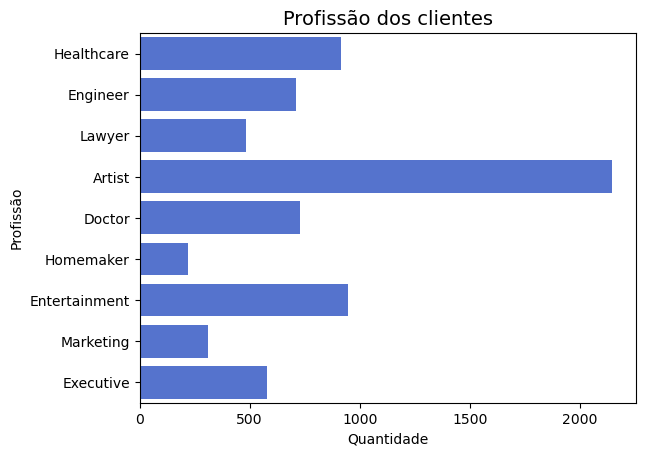

In [10]:
plt.title('Profissão dos clientes',fontsize=14)
sns.countplot(y='Profession',data=seg_clientes,
              color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Profissão');

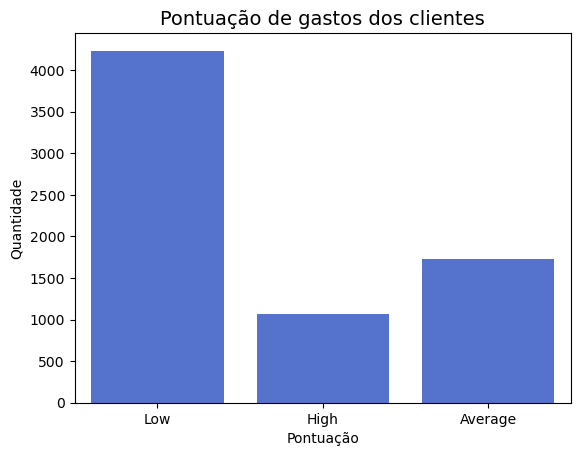

In [11]:
plt.title('Pontuação de gastos dos clientes',fontsize=14)
sns.countplot(x='Spending_Score',data=seg_clientes,
              color='royalblue')
plt.xlabel('Pontuação')
plt.ylabel('Quantidade');

## Análise Bivariada

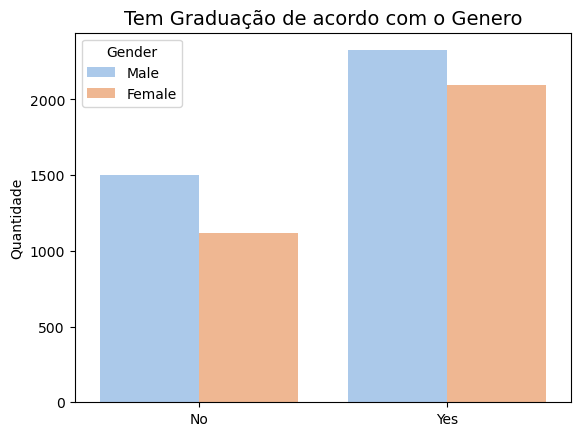

In [12]:
plt.title('Tem Graduação de acordo com o Genero',fontsize=14)
sns.countplot(x='Graduated',data=seg_clientes,hue='Gender',
              palette='pastel')
plt.xlabel('')
plt.ylabel('Quantidade');

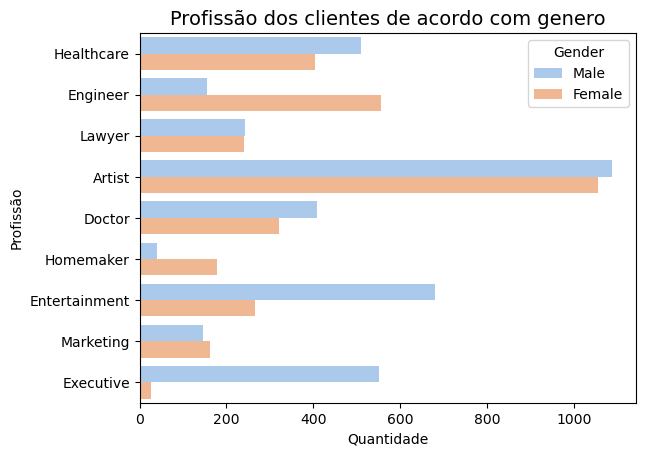

In [13]:
plt.title('Profissão dos clientes de acordo com genero',fontsize=14)
sns.countplot(y='Profession',data=seg_clientes,hue='Gender',
              palette='pastel')
plt.xlabel('Quantidade')
plt.ylabel('Profissão');

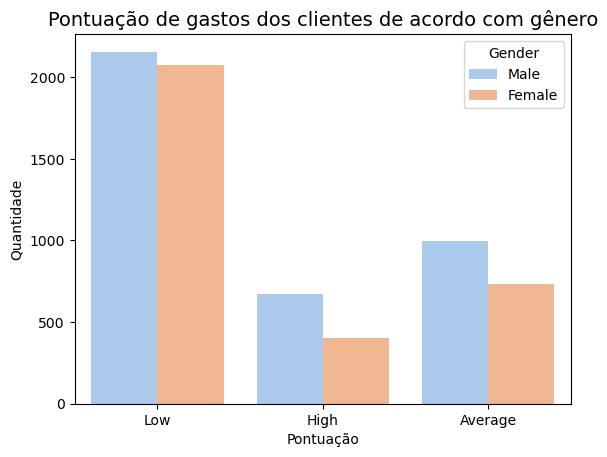

In [14]:
plt.title('Pontuação de gastos dos clientes de acordo com gênero',fontsize=14)
sns.countplot(x='Spending_Score',data=seg_clientes,hue='Gender',
              palette='pastel')
plt.xlabel('Pontuação')
plt.ylabel('Quantidade');

Text(0, 0.5, 'Quantidade')

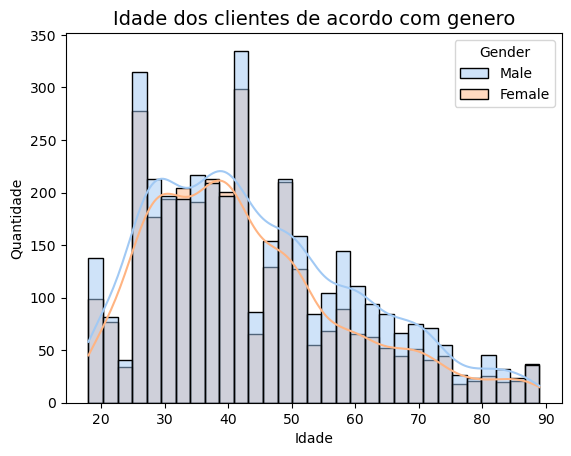

In [15]:
plt.title('Idade dos clientes de acordo com genero',fontsize=14)
sns.histplot(x='Age',data=seg_clientes,kde=True,palette='pastel',
             hue='Gender')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

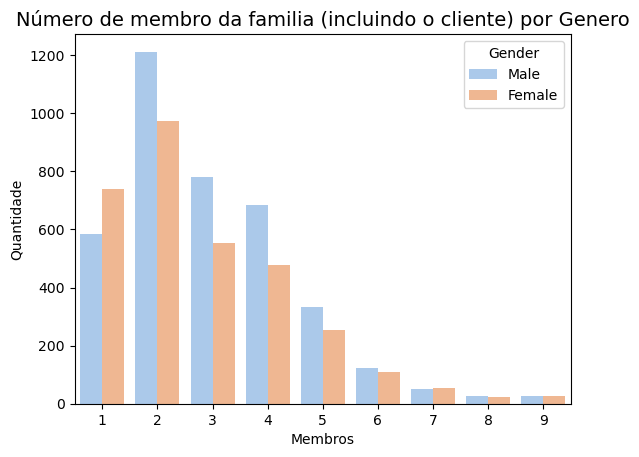

In [16]:
plt.title('Número de membro da familia (incluindo o cliente) por Genero',fontsize=14)
sns.countplot(x='Family_Size',data=seg_clientes,palette='pastel',
              hue='Gender')
plt.xlabel('Membros')
plt.ylabel('Quantidade');

Text(0, 0.5, 'Quantidade')

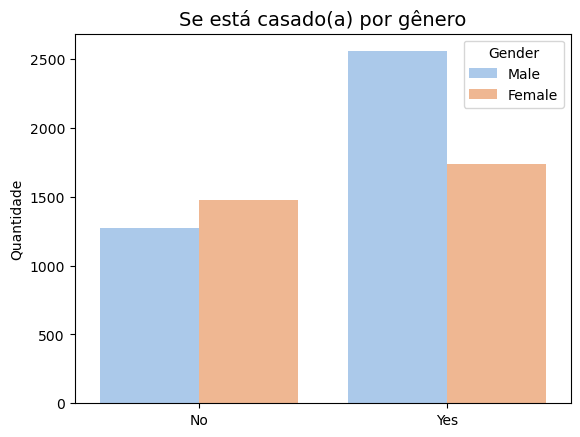

In [17]:
plt.title('Se está casado(a) por gênero',fontsize=14)
sns.countplot(x='Ever_Married',data=seg_clientes,palette='pastel',hue='Gender')
plt.xlabel('')
plt.ylabel('Quantidade')

## Por pontuação

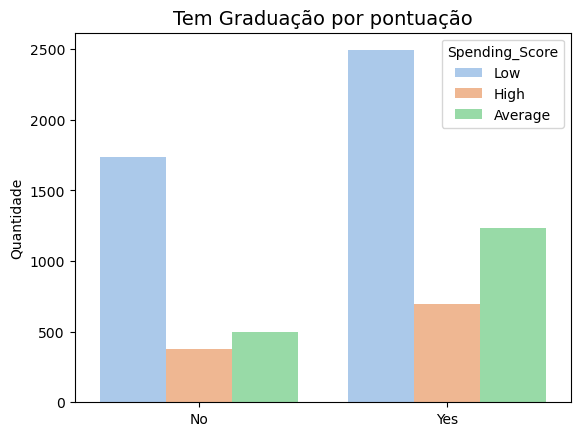

In [18]:
plt.title('Tem Graduação por pontuação',fontsize=14)
sns.countplot(x='Graduated',data=seg_clientes,hue='Spending_Score',
              palette='pastel')
plt.xlabel('')
plt.ylabel('Quantidade');

Text(0, 0.5, 'Quantidade')

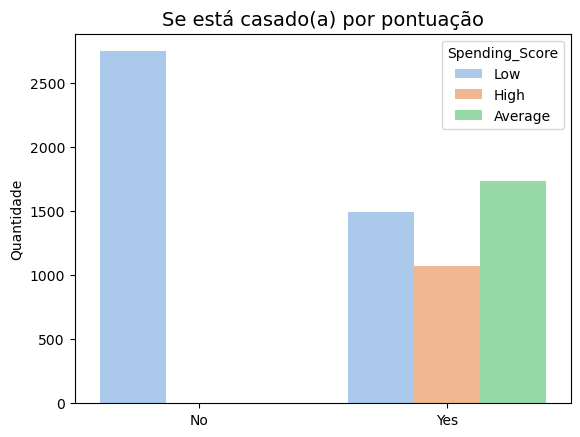

In [19]:
plt.title('Se está casado(a) por pontuação',fontsize=14)
sns.countplot(x='Ever_Married',data=seg_clientes,palette='pastel',hue='Spending_Score')
plt.xlabel('')
plt.ylabel('Quantidade')

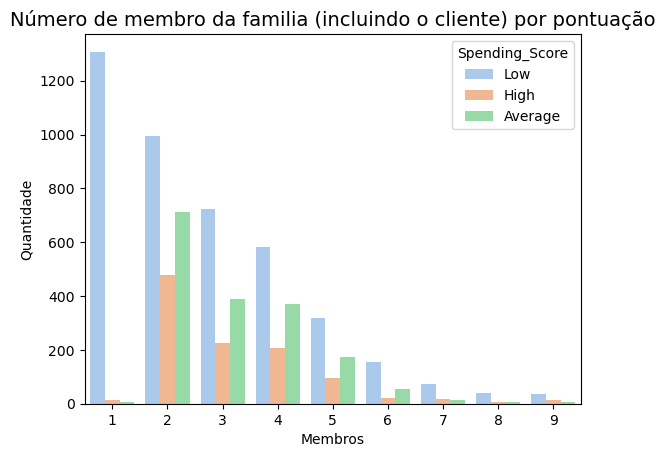

In [20]:
plt.title('Número de membro da familia (incluindo o cliente) por pontuação',fontsize=14)
sns.countplot(x='Family_Size',data=seg_clientes,palette='pastel',
              hue='Spending_Score')
plt.xlabel('Membros')
plt.ylabel('Quantidade');

Text(0, 0.5, 'Quantidade')

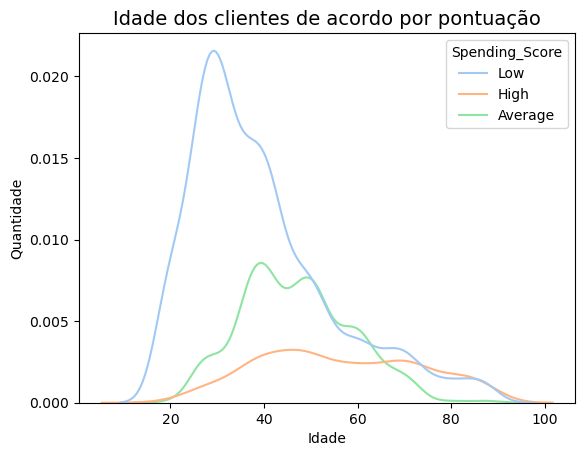

In [21]:
plt.title('Idade dos clientes de acordo por pontuação',fontsize=14)
sns.kdeplot(x='Age',data=seg_clientes,palette='pastel',
             hue='Spending_Score')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

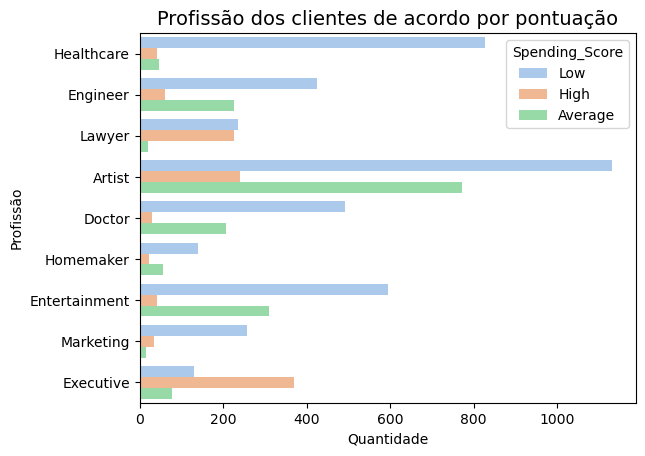

In [22]:
plt.title('Profissão dos clientes de acordo por pontuação',fontsize=14)
sns.countplot(y='Profession',data=seg_clientes,hue='Spending_Score',
              palette='pastel')
plt.xlabel('Quantidade')
plt.ylabel('Profissão');

## por casamento

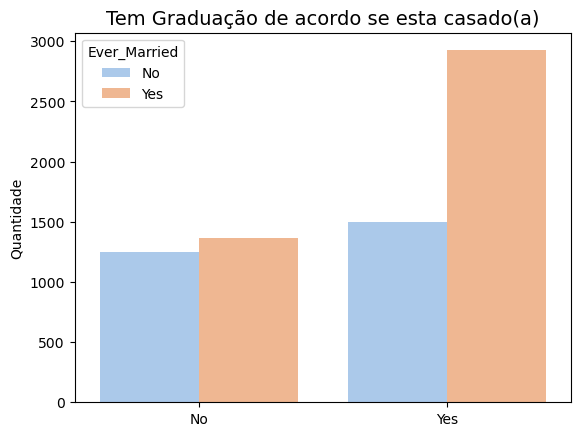

In [23]:
plt.title('Tem Graduação de acordo se esta casado(a)',fontsize=14)
sns.countplot(x='Graduated',data=seg_clientes,hue='Ever_Married',
              palette='pastel')
plt.xlabel('')
plt.ylabel('Quantidade');

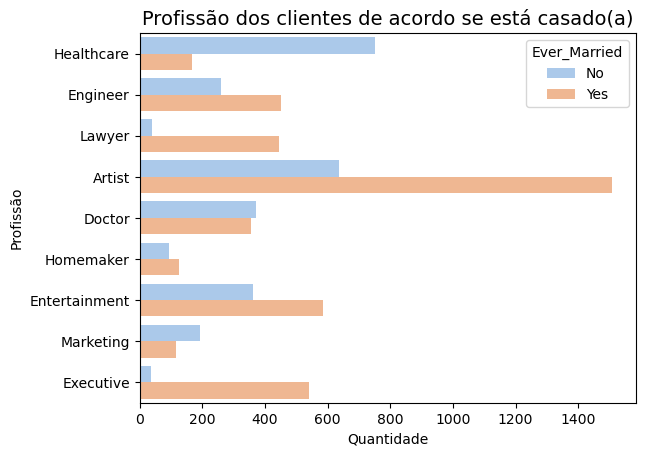

In [24]:
plt.title('Profissão dos clientes de acordo se está casado(a)',fontsize=14)
sns.countplot(y='Profession',data=seg_clientes,hue='Ever_Married',
              palette='pastel')
plt.xlabel('Quantidade')
plt.ylabel('Profissão');

Text(0, 0.5, 'Quantidade')

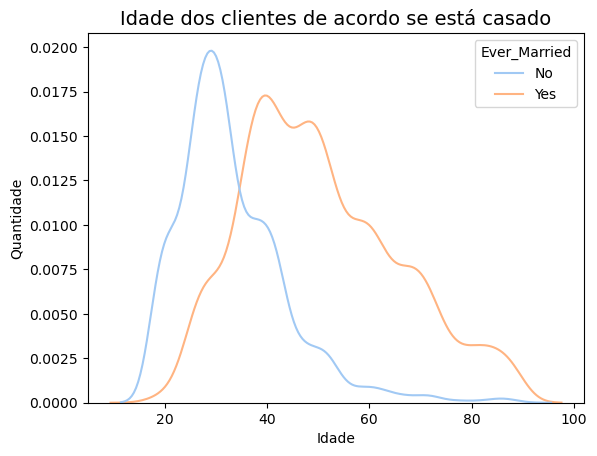

In [25]:
plt.title('Idade dos clientes de acordo se está casado',fontsize=14)
sns.kdeplot(x='Age',data=seg_clientes,palette='pastel',
             hue='Ever_Married')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

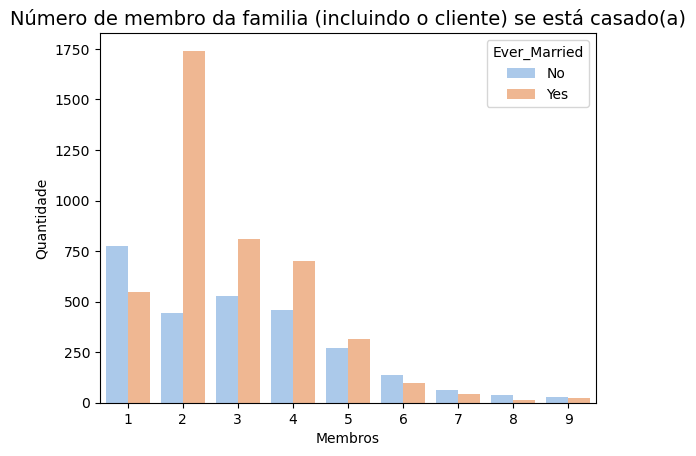

In [26]:
plt.title('Número de membro da familia (incluindo o cliente) se está casado(a)',fontsize=14)
sns.countplot(x='Family_Size',data=seg_clientes,palette='pastel',
              hue='Ever_Married')
plt.xlabel('Membros')
plt.ylabel('Quantidade');

# Por profissão

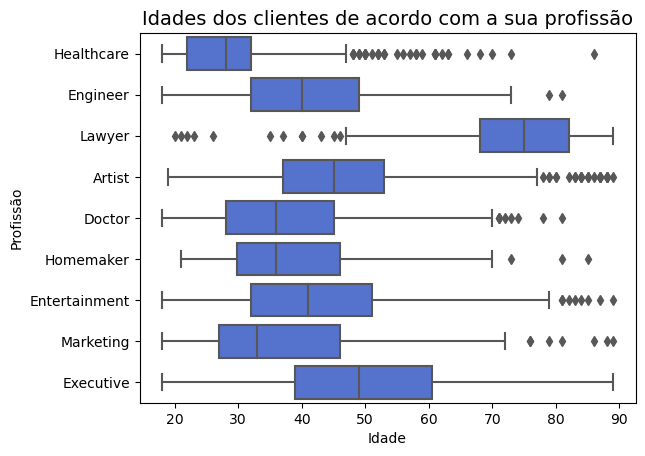

In [27]:
plt.title('Idades dos clientes de acordo com a sua profissão',
          fontsize=14)
sns.boxplot(y='Profession',x='Age',data=seg_clientes,color='royalblue')
plt.xlabel('Idade')
plt.ylabel('Profissão');

<Axes: xlabel='Family_Size', ylabel='count'>

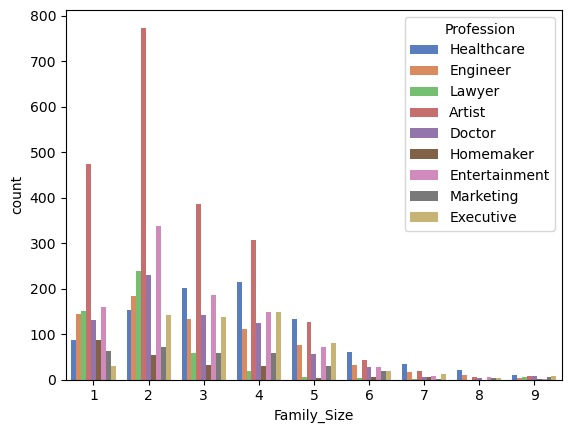

In [28]:
sns.countplot(x='Family_Size',hue='Profession',data=seg_clientes,palette='muted')

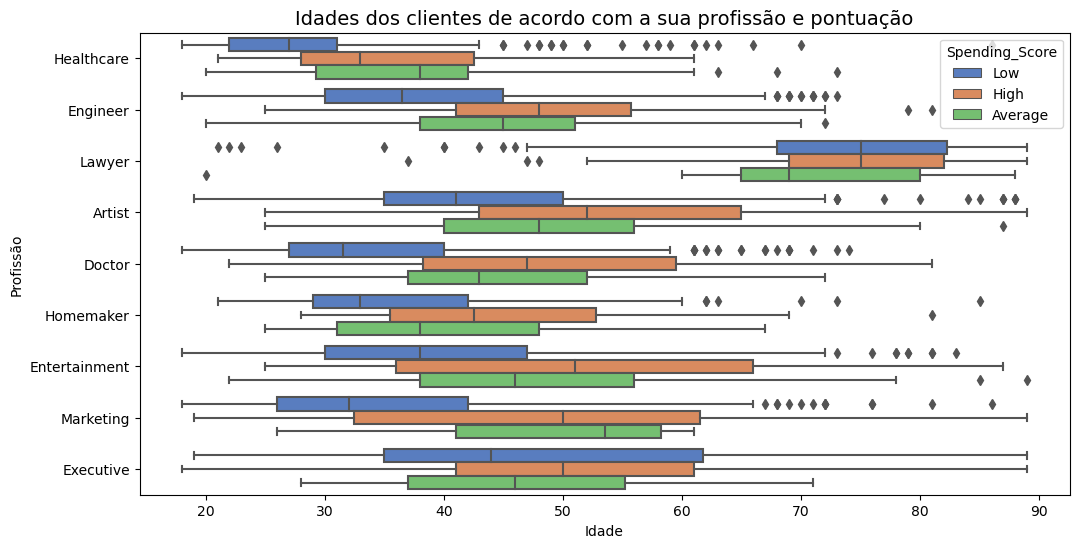

In [29]:
plt.figure(figsize=(12,6))
plt.title('Idades dos clientes de acordo com a sua profissão e pontuação',
          fontsize=14)
sns.boxplot(y='Profession',x='Age',data=seg_clientes,palette='muted',
            hue='Spending_Score')
plt.xlabel('Idade')
plt.ylabel('Profissão');

## Pré-tratamento



In [30]:
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1,Low,4
1,Female,Yes,67,Yes,Engineer,1,Low,1
2,Male,Yes,67,Yes,Lawyer,0,High,2
3,Male,Yes,56,No,Artist,0,Average,2
4,Male,No,32,Yes,Healthcare,1,Low,3


In [31]:
seg_clientes['Gender'] = seg_clientes['Gender'].map({'Male':0,'Female':1})
seg_clientes['Ever_Married'] = seg_clientes['Ever_Married'].map({'No':0,'Yes':1})
seg_clientes['Spending_Score'] = seg_clientes['Spending_Score'].map({'Low':0,'Average':1,
                                                                    'High':2})
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,0,22,No,Healthcare,1,0,4
1,1,1,67,Yes,Engineer,1,0,1
2,0,1,67,Yes,Lawyer,0,2,2
3,0,1,56,No,Artist,0,1,2
4,0,0,32,Yes,Healthcare,1,0,3


In [32]:
seg_clientes['Graduated'] = seg_clientes['Graduated'].map({'No':0,'Yes':1})
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,0,22,0,Healthcare,1,0,4
1,1,1,67,1,Engineer,1,0,1
2,0,1,67,1,Lawyer,0,2,2
3,0,1,56,0,Artist,0,1,2
4,0,0,32,1,Healthcare,1,0,3


In [35]:
seg_clientes = pd.get_dummies(seg_clientes,columns=['Profession'])
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,22,0,1,0,4,0,0,0,0,0,1,0,0,0
1,1,1,67,1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,67,1,0,2,2,0,0,0,0,0,0,0,1,0
3,0,1,56,0,0,1,2,1,0,0,0,0,0,0,0,0
4,0,0,32,1,1,0,3,0,0,0,0,0,1,0,0,0


In [36]:
seg_clientes.to_csv('seg_clientes_pre.csv')